In [139]:
import fooof
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

print("Packages Imported")

Packages Imported


In [40]:
# load sample lfp data
all_chan_spectra = np.load("G:/Shared drives/visual_encoding/data/lfp_data/spectra/psd/natural_movie_one_more_repeats/spectra_766640955.npz")
freq, all_chan_psd = all_chan_spectra['freq'], all_chan_spectra['spectra']
spectra = all_chan_psd[0,6,:] # single channel

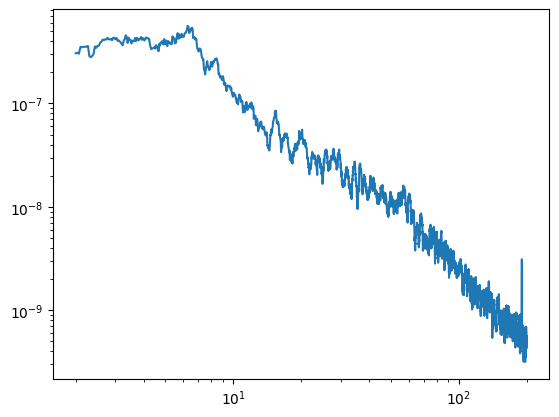

In [41]:
plt.loglog(freq, spectra)

In [42]:
# fooof settings
N_JOBS = -1 # number of jobs for parallel processing, psd_array_multitaper()
SPEC_PARAM_SETTINGS = {
    'peak_width_limits' :   [2, 20], # default: (0.5, 12.0)) - reccomends at least frequency resolution * 2
    'min_peak_height'   :   0, # (default: 0) 
    'max_n_peaks'       :   4, # (default: inf)
    'peak_threshold'    :   2, # (default: 2.0)
    'aperiodic_mode'    :   'knee',
    'verbose'           :   False}

In [43]:
# fooof parameterization
f = fooof.FOOOF(**SPEC_PARAM_SETTINGS)
f.set_check_data_mode(False)
f._check_freqs = False
f.fit(freq, spectra)

In [44]:
off = f.get_params('aperiodic_params', 'offset')
exp = f.get_params('aperiodic_params', 'exponent')
knee = f.get_params('aperiodic_params', 'knee')
print(f"Offset: {off}, Exponent: {exp}, Knee: {knee}")

Offset: -4.831387143444542, Exponent: 1.9254324594357901, Knee: 50.149347680802734


In [78]:
from specparam.sim.sim import sim_power_spectrum

# gen_power_spectrum

In [108]:
sim_params = {
    'freq_range': [freq[0], freq[-1]],
    'aperiodic_params': f.get_params('aperiodic_params'),
    'periodic_params': [],
    'nlv': 0
    
}


sim_freqs, sim_spectra = sim_power_spectrum(**sim_params)

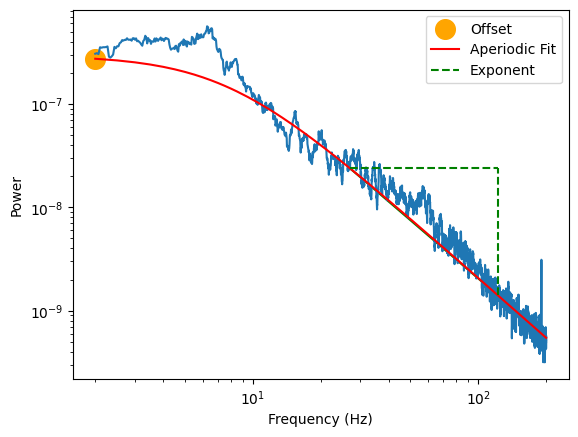

In [136]:
idxs = [50, 240]
x1, y1 = sim_freqs[idxs[0]], sim_spectra[idxs[0]]
x2, y2 = sim_freqs[idxs[1]], sim_spectra[idxs[1]]

# empirical data
plt.loglog(freq, spectra)

# offset
plt.scatter(sim_freqs[0], sim_spectra[0], color='orange', label='Offset',s=200)

# aperiodic fit
plt.loglog(sim_freqs, sim_spectra, label='Aperiodic Fit', color='red')

# exponent
plt.plot((x1, x2),(y1, y1), color='green', linestyle='--', label='Exponent')
plt.plot((x2, x2),(y2, y1), color='green', linestyle='--')
plt.plot((x1, x2),(y1, y2), color='green', linestyle='-', zorder=0)


# stuffs
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend();

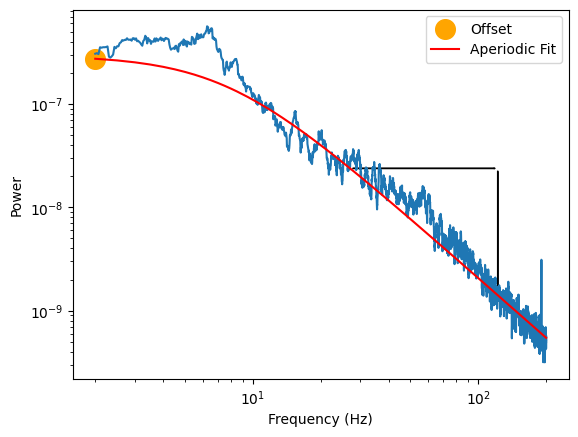

In [151]:
idxs = [50, 240]
x1, y1 = sim_freqs[idxs[0]], sim_spectra[idxs[0]]
x2, y2 = sim_freqs[idxs[1]], sim_spectra[idxs[1]]

fig, ax = plt.subplots()

# empirical data
ax.loglog(freq, spectra)

# offset
ax.scatter(sim_freqs[0], sim_spectra[0], color='orange', label='Offset',s=200)

# aperiodic fit
ax.loglog(sim_freqs, sim_spectra, label='Aperiodic Fit', color='red')

# exponent
ax.add_patch(mpl.patches.FancyArrowPatch((x1, y1), (x2, y1)))
ax.add_patch(mpl.patches.FancyArrowPatch((x2, y1), (x2, y2)))


# stuffs
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power')
ax.legend();